## Problem Statement:


Monalisa, who is a Life sciences researcher does Pharmacovigilance (post-market drug safety surveillance) for Pharma Products.<br>
Pharmacovigilance identifies ADRs (adverse drug reactions) after a drug’s release. Comprehensive knowledge of ADRs can reduce the detrimental impact on patient’s health system. Practically, clinical trials cannot investigate all settings in which a drug will be used, making it impossible to fully characterize the drug’s adverse effect profile before its approval. Pharmacovigilance methods continuously analyse frequently updated data sources, Twitter in particularly because of its large user base, demographic variability, and publicly available data.<br>
ADR detection in social media requires automated methods to process the high data volume. It would greatly help her if she is able to automate the segmentation of Tweet into either ADR or NON- ADR, on the basis of Drug, Symptom and Effect mentioned in future.<br>
**Our Job is to Classify the Tweet into the 2 segments:**
- ADR
- Non-ADR

**Data Set:**
<br>
Attached data set (Data.csv) has tweets labelled as ADR and NON-ADR. The file has information which contains column like user IDs, tweet IDs, and label along with the tweet.
<br>
Since this is a supervised binary Classification Task based on Text-Data, we will preprocess our Text data and use supervised Classification algorithms to build our Model with accuracy of prediction as our Major Evaluation Parameter.



#### Given below is the steps that we will follow in model bulding process:.

- **Problem definition and identification**
- **Data cleaning, pre-processing, Feature engineering,Exploratory analysis and visualization**
- **Designing or picking up correct analytical framework for predictive analyics**
- **Using framework picked to produce model and tuning it**
- **Execution, testing and Evaluation of our model**
- **Feedback**

## Step 1) Importing Packages and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Data.csv')

# Have a grasp of how our data looks.
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


## Step 2) Exploring the Data

In [2]:
# from google.colab import files
# uploaded = files.upload()
import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# df2.head()

In [3]:
df.describe()

,UserId,TweetId,ADR_label
count,2.351600e+04,23516.000000,23516.000000
mean,1.111427e+07,506575.615538,0.290100
std,5.544573e+06,286621.435825,0.453818
min,1.879500e+04,10029.000000,0.000000
25%,7.743588e+06,258683.000000,0.000000
50%,1.121584e+07,509308.500000,0.000000
75%,1.601816e+07,755094.000000,1.000000
max,2.046562e+07,999864.000000,1.000000


In [4]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23516 entries, 0 to 23515
Data columns (total 4 columns):
UserId       23516 non-null int64
TweetId      23516 non-null int64
Tweet        23516 non-null object
ADR_label    23516 non-null int64
dtypes: int64(3), object(1)
memory usage: 735.0+ KB


In [5]:
# No Duplicates available
df.drop('UserId', axis=1).duplicated().sum()

0

In [6]:
# Checking for Null Valuesb
df.isnull().sum()

UserId       0
TweetId      0
Tweet        0
ADR_label    0
dtype: int64

In [7]:
df.ADR_label.value_counts()

0    16694
1     6822
Name: ADR_label, dtype: int64

### Let's Plot the ADR vs Non_ADR counts in our Dataset

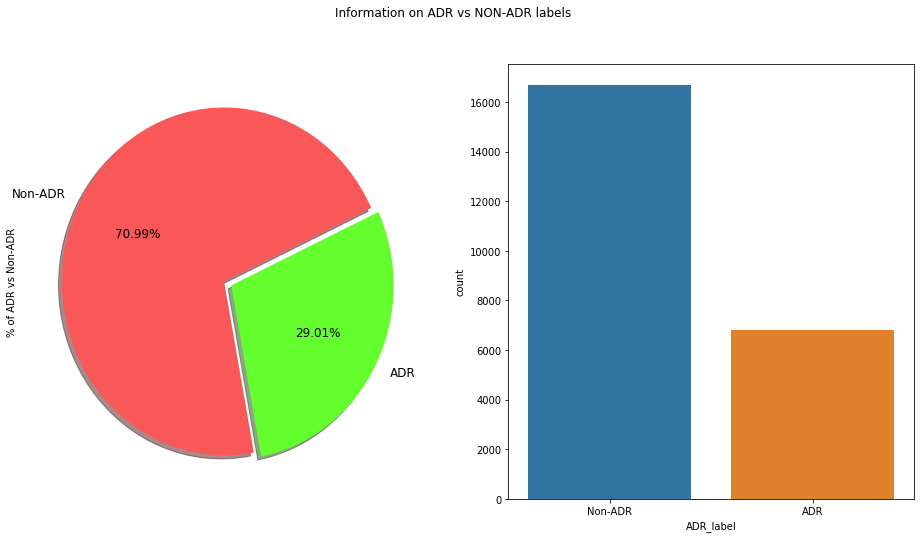

In [8]:
f,ax = plt.subplots(1,2,figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = 'Non-ADR','ADR'
plt.suptitle('Information on ADR vs NON-ADR labels')
df['ADR_label'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax =ax[0], shadow = True,
                                    colors = colors, labels = labels, fontsize =12, startangle=25)
ax[0].set_ylabel('% of ADR vs Non-ADR')

palette = ["#64FE2E", "#FA5858"]
sns.countplot(x='ADR_label', data=df)
ax[1].set_xticklabels(['Non-ADR','ADR'],rotation=0, rotation_mode="anchor")
plt.show()

**As we can see from the pie-plot, around 29% of our tweets fall into ADR Category, while 71% into Non-ADR category**<br>
We will use this fact to Adjust our Model Weights while fine tuning the Model Parameters


## Step 3) Preparing the Data for Modeling 
- **Splitting Our data in Training and Testing set**
- **Seperating Labels from Predictors**
- ** Feature Engineering on Predictor Columns**

In [9]:
# Importing the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Seperating predictors from outcome label 
y = df['ADR_label']
X = df.drop(['ADR_label'], axis =1)

#Converting all Tweets to lower-case
X['Tweet']=X['Tweet'].str.lower()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                             X, y, 
                                             test_size=0.30, 
                                             random_state=53)

## Feature Engineering
**In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text**<br>
In this section, We'll use pandas alongside scikit-learn to create a sparse text vectorizer that we can use to train and test any supervised model but before that let's understand lemmatization process.

## Text - Preprocessing
We need to reduce inflectional forms of words in our Tweet such that we convert derivationally related forms of a word to a common base form. For instance:<br>
car, cars, car's, cars' = car.<br>
For this purpose, we have two methods, Stemming and Lemmatization.
Let's understand the difference and than pick the appropraite method of our Text pre-processing.
- **Stemming** algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.
- **Lemmatization**, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. <br><br>
**As a conclusion, we can say developing a stemmer is far simpler than building a lemmatizer. In the latter, deep linguistics knowledge is required to create the dictionaries that allow the algorithm to look for the proper form of the word. Once this is done, the noise will be reduced and the results provided on the information retrieval process will be more accurate.**<br>
So, we will proceed with lemmatization using WordNet corpus of NLTK

In [10]:
#nltk.download('wordnet')

In [11]:
# Importing NLTK and initializing the Lemmatizer and tokenizer
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()



In [12]:
# function to lemmatize each row of Tweet column
def lemmatize_text(text):
  return ' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text))

In [13]:
X_train['Tweet_l'] = X_train.Tweet.apply(lemmatize_text)
X_test['Tweet_l'] = X_test.Tweet.apply(lemmatize_text)
X_test.head()

,UserId,TweetId,Tweet,Tweet_l
17579,20234160,592898,although this patient had been exposed to seve...,although this patient had been exposed to seve...
5305,7428724,263401,four cases of oesophageal damage associated wi...,four case of oesophageal damage associated wit...
8355,1469187,609107,we report the displacement of a tunnelled intr...,we report the displacement of a tunnelled intr...
18545,623061,724009,"this translocation determines a fusion gene, b...","this translocation determines a fusion gene, b..."
10250,18795,844053,clinical and biochemical abnormalities disappe...,clinical and biochemical abnormality disappear...


#### Extracting Features from Tweet-Text using sci-kit learn to build Bag-of-Word Vectors.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.<br>
It also takes care of ignoring the punctuations and lowercasing each term.

(Note: Document here represents Tweets)


We will use CountVectorizer to learn the vocabulary of a set of texts and then transform them into a dataframe that can be used for building models. I wanted to follow up on that with a few simple ways to make that dataframe more suitable for prediction.

CountVectorizer has a few important parameters we should know.

- stop_words: Since CountVectorizer just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. Your model can often be improved if you don’t take those words into account. Stop words are just a list of words you don’t want to use as features. You can set the parameter stop_words=’english’ to use a built-in list. Alternatively you can set stop_words equal to some custom list. This parameter defaults to None.
- ngram_range: An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1).
In a recent project where I usually find that including 2-grams as features boosts my model’s predictive power significantly. This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.
- min_df, max_df: These are the minimum and maximum document frequencies words/n-grams must have to be used as features. If either of these parameters are set to integers, they will be used as bounds on the number of documents each feature must be in to be considered as a feature. If either is set to a float, that number will be interpreted as a frequency rather than a numerical limit. min_df defaults to 1 (int) and - max_df defaults to 1.0 (float).
- max_features: This parameter is pretty self-explanatory. The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else.

In [14]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))

# fitting and Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.Tweet.values)

# Transforming the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.Tweet.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '00 12', '00 50', '00 91', '00 discontinued', '000', '000 000', '000 12', '000 200', '000 amylase']


One issue with  countVectorizer is that some words will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).<br>
<br>
**w(i) = TF(i) * IDF(i)**

**This downscales words that appear a lot across documents.**


Similar to the sparse CountVectorizer created in the previous section, we'll work on creating tf-idf vectors for Tweet-Texts. We'll set up a TfidfVectorizer

In [15]:
# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

# Transforming the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.Tweet.values)

# Transforming the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.Tweet.values)

# Printing the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Printing the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '000', '00001', '0001', '00025', '001', '002', '004', '005', '008']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# Creating the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Creating the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Printing the head of count_df
print(count_df.head())

# Printing the head of tfidf_df
print(tfidf_df.head())


   00  00 12  00 50  00 91  00 discontinued  000  000 000  000 12  000 200  \
0   0      0      0      0                0    0        0       0        0   
1   0      0      0      0                0    0        0       0        0   
2   0      0      0      0                0    0        0       0        0   
3   0      0      0      0                0    0        0       0        0   
4   0      0      0      0                0    0        0       0        0   

   000 amylase        ...         zygomycetes rarely  zygomycosis  \
0            0        ...                          0            0   
1            0        ...                          0            0   
2            0        ...                          0            0   
3            0        ...                          0            0   
4            0        ...                          0            0   

   zygomycosis 13  zygomycosis caused  zygomycosis days  \
0               0                   0                 0  

## Step 4) Modeling - process: picking the correct class of Algorithm
### Let's Create A baseline model for Benchmarking: Naive Bayes with scikit-learn
We are going to use Naive Bayes Class of model to build our Base/Vanilla Model since it is the most reasonable model to use when training a new supervised model using text vector data due to it's basis in Probability Theory

In [17]:
# Importing the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Instantiating a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Creating the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculating the accuracy score: score
score =metrics.accuracy_score(y_test, pred)
print(score)

# Calculating the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

0.8752657689581856
[[4509  483]
 [ 397 1666]]


In [18]:
# Creating a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fitting the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Creating the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculating the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculating the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred )
print(cm)

0.8372785258681786
[[4857  135]
 [1013 1050]]


In [19]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0],feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
print('\n')
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

0 [(-10.34584364622171, '00'), (-10.34584364622171, '0001'), (-10.34584364622171, '00025'), (-10.34584364622171, '001'), (-10.34584364622171, '002'), (-10.34584364622171, '004'), (-10.34584364622171, '005'), (-10.34584364622171, '008'), (-10.34584364622171, '0096'), (-10.34584364622171, '0099'), (-10.34584364622171, '015'), (-10.34584364622171, '025'), (-10.34584364622171, '030'), (-10.34584364622171, '035'), (-10.34584364622171, '038'), (-10.34584364622171, '04'), (-10.34584364622171, '042'), (-10.34584364622171, '04547'), (-10.34584364622171, '0457'), (-10.34584364622171, '06')]


1 [(-6.484178542837793, 'use'), (-6.373061952329657, 'toxicity'), (-6.3275731225863785, 'treated'), (-6.315227587570821, 'administration'), (-6.297858642322655, 'renal'), (-6.235214296915347, 'following'), (-6.155362478851178, 'severe'), (-6.115259506562248, 'old'), (-6.115127557602337, 'year'), (-6.022098302367902, 'syndrome'), (-5.951344188539078, 'acute'), (-5.935984906430272, 'patients'), (-5.8678600211

**For Modeling Our Dataset, we will go ahead with CountVectorizer Features, since the words that appear many time in our Tweet, for example `mg` are important for prediction and we don't want them to be DownScaled**<br>
This is Evident from the accuracy score of our prediction on Test Data

### Let's Try Logistic Regression Classifier on Count Vectors

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
baselog_model = LogisticRegression()
baselog_model.fit(count_train,y_train)
y_pred = baselog_model.predict(count_test)
print(accuracy_score(y_pred,y_test))

0.9020552799433026


**As we can see logistics Regression clear outperformed NBClassifier, let's try some more classes of algos before creating the final Model and tuning it **

### Using advanced Classification Algos for prediction and Comparing their Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB





In [ ]:
# dict_of_algos={'LR':LogisticRegression(),'svc':SVC(),'KNC':KNeighborsClassifier(),
#                'DT':tree.DecisionTreeClassifier(),'MLPc':MLPClassifier(),
#                'GRBC':GradientBoostingClassifier(),'RFC':RandomForestClassifier()}
# def accuracy_of_algos(dictionary):
#     df_of_accuracy = pd.DataFrame(columns=['classifier','test_score'])
#     count=0
#     for k,v in dictionary.items():
#         v.fit(count_train,y_train)
#         y_pred = v.predict(count_test)
#         df_of_accuracy.loc[count,'classifier']=k
#         df_of_accuracy.loc[count,'test_score'] = accuracy_score(y_test,y_pred)
#         count+=1
#     return df_of_accuracy
# print(accuracy_of_algos(dict_of_algos))    

Considering Training accuracy, Training-Time and Testing accuracy of each Model, to compare models

In [ ]:
# Time for Classification Models
import time


from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    'NB_Classifier':MultinomialNB()

}

In [ ]:

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train,X_test, y_test,verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'training_time','test_score'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        
        y_pred=classifier.predict(X_test)
        test_score=accuracy_score(y_test,y_pred)
      
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        df_results.loc[count,'test_score']=test_score

        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(count_train, y_train,count_test, y_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.49 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 30.94 s
trained Gradient Boosting Classifier in 13.39 s
trained Decision Tree in 13.93 s
trained Random Forest in 8.11 s
trained NB_Classifier in 0.02 s
                     classifier  train_score  training_time  test_score
4                 Decision Tree     1.000000      13.933179    0.859816
0           Logistic Regression     0.998603       0.488675    0.902055
5                 Random Forest     0.994897       8.112080    0.876967
6                 NB_Classifier     0.974181       0.015810    0.875266
3  Gradient Boosting Classifier     0.815686      13.388350    0.802835
1             Nearest Neighbors     0.809246       0.003267    0.768391
2                    Linear SVM     0.710892      30.938137    0.707583


### Avoiding Overfitting:
Brief Description of Overfitting: <br>
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an good score in the training set but when we use the test set (Unknown data for the model) we get bad score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a Tweets is ADR or Not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores. <br><br>


How can we avoid Overfitting?<br>
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, count_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, count_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, count_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, count_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, count_train, y_train, cv=3)
rand_mean = rand_scores.mean()


# Naives Bayes
nav_clf = MultinomialNB()
nav_scores = cross_val_score(nav_clf, count_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, knn_mean, tree_mean, grad_mean, rand_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.883726
4,Rand FC,0.848613
5,Naives Bayes,0.836159
2,Dec Tree,0.835552
3,Grad B CLF,0.803293
1,KNN,0.749651


### **As we can see Logistic Regression Clearly outperformed all other Class of Alogorithms, So we will proceed with Logistics Regression for our Final Model**


## Step 5) Final Model using Logistic Regression Algorithm

In [ ]:
from sklearn.metrics import accuracy_score

logreg_clf = LogisticRegression()
logreg_clf.fit(count_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred=logreg_clf.predict(count_test)
print ("Logistics Regression Classifier Train accuracy is %2.2f" % accuracy_score(y_test, y_pred))

Logistics Regression Classifier Train accuracy is 0.90


### So we are able to predict values in test Data with `90.0%` Accuracy on count Vectors

### Let's Hypertune the model using GridSearchCV intensively with a 3 fold cross validation strategy.
-  penalty: Used to specify the norm used in the penalization
- class_weight : Weights associated with classes in the form {class_label: weight}
This parameter quite important in case of imbalanced dataset.
- n_jobs : int or None, optional (default=None)
Number of CPU cores used when parallelizing over classes.
- C : Inverse of regularization strength; must be a positive float.


In [ ]:
param_test = {
   'penalty':['l1','l2'],
   'class_weight': ['balanced',{0:0.7,1:0.3},None],
   'n_jobs' : [-1],
   'C' : [24,25,26],
   'tol':[0.04,0.05,0.06],
   'solver':['liblinear','warn']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(estimator = LogisticRegression(random_state=42), param_grid = param_test, scoring='accuracy',n_jobs=-1,iid=False, cv=3)


In [ ]:
gsearch.fit(count_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'class_weight': ['balanced', {0: 0.7, 1: 0.3}, None], 'n_jobs': [-1], 'C': [24, 25, 26], 'tol': [0.04, 0.05, 0.06], 'solver': ['liblinear', 'warn']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
print(gsearch.best_params_)
print(gsearch.best_score_)

{'C': 25, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.04}
0.886763124615154


#### Building our final model using Parameters returned by GridSearchCV

In [ ]:
logreg_clf=LogisticRegression(**gsearch.best_params_, random_state=42)
logreg_clf.fit(count_train,y_train)
y_pred = logreg_clf.predict(count_train)
accuracy_score(y_train,y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11702
           1       1.00      1.00      1.00      4759

   micro avg       1.00      1.00      1.00     16461
   macro avg       1.00      1.00      1.00     16461
weighted avg       1.00      1.00      1.00     16461



### Using Model to predict on Test Data

In [ ]:
y_pred = logreg_clf.predict(count_test)
y_proba = logreg_clf.predict_proba(count_test)[:,1]
print(accuracy_score(y_test,y_pred))

0.9019135364989369


In [ ]:
#Creating Dataframe of TweetID,Actual labels, Predicted Labels and predicted probability
X_test_df = pd.DataFrame({'TweetID':X_test.TweetId.values,'Actual_ADR_label':y_test.values,
                          'Predicted_ADR_label':y_pred.reshape(-1), 'predict_probability':y_proba.reshape(-1)})

In [ ]:
X_test_df.head()

,TweetID,Actual_ADR_label,Predicted_ADR_label,predict_probability
0,592898,0,0,0.007202
1,263401,1,1,0.792614
2,609107,0,0,0.226630
3,724009,0,0,0.022986
4,844053,0,0,0.306027


## Evaluation of Model
Our Main criteria for Model Evaluation is Accuracy but in this section we will see some other very important Model Evaluation metrics as well and use them to evaluate the perfomance of Our Model.<br>
Let's start with Confusion Matrix:

### Insights of a Confusion Matrix: 
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying Tweets that are likely to be ADR. We will see in the confusion matrix, four terms:<br>
The True Positives, False Positives, True Negatives and False Negatives.<br><br>

**Positive/Negative:** Type of Class (label) ["Non-ADR", "ADR"]
**True/False:** Correctly or Incorrectly classified by the model.<br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "0" class or correctly predicted Non-ADR <br>

**False Negatives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "1" class or ADR's which were classified as Non-ADR by our model. <br>

**False Positives (Top-Right Square):** This is the number of **incorrectly** classifications of the "0" class or Non-ADR which were classified as ADR by our model <br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "1" class or ADR class correctly predicted as ADR.

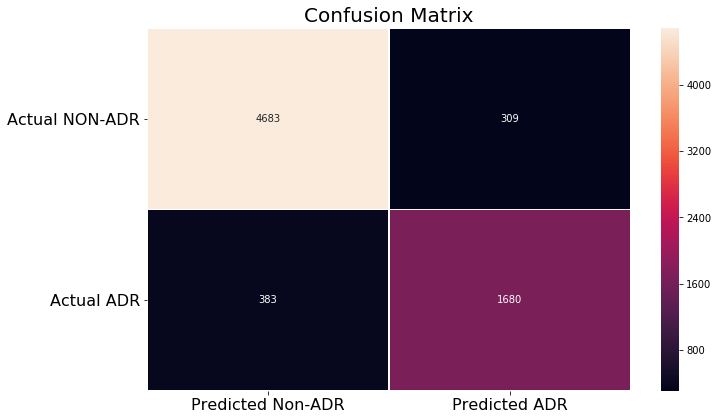

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(["Predicted Non-ADR",'Predicted ADR'],fontsize=16, rotation=360)
ax.set_yticklabels(['Actual NON-ADR', 'Actual ADR'], fontsize=16, rotation=360)
plt.show()


### Precision and Recall 
We will see the Precsion and Recall score in next cell, but before that let's understand what precision and recall actualy mean:<br>
- **Precision Score:** Of all the ADR's tweets that our Model predicted, how many are actually true.<br>
- **Recall Score:**Of all the Actual ADR tweets, how many did our model actually predicted correctly


In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score


print('The model is {c} % sure that the tweets predcited as ADR are ADR'.format(c=np.round(precision_score(y_test, y_pred),2)*100))
print('The model is predicting {c} % of all ADR tweets'.format(c=np.round(recall_score(y_test, y_pred),2)*100))


The model is 84.0 % sure that the tweets predcited as ADR are ADR
The model is predicting 81.0 % of all ADR tweets


### f-1 score
**f-1 Score** is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. In other words, an F1-score (from 0 to 9, 0 being lowest and 9 being the highest) is a mean of an individual's performance, based on two factors i.e. precision and recall

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)*100

82.92201382033564

### Plotting the Graph of Probability vs Precision and Probability vs Recall 

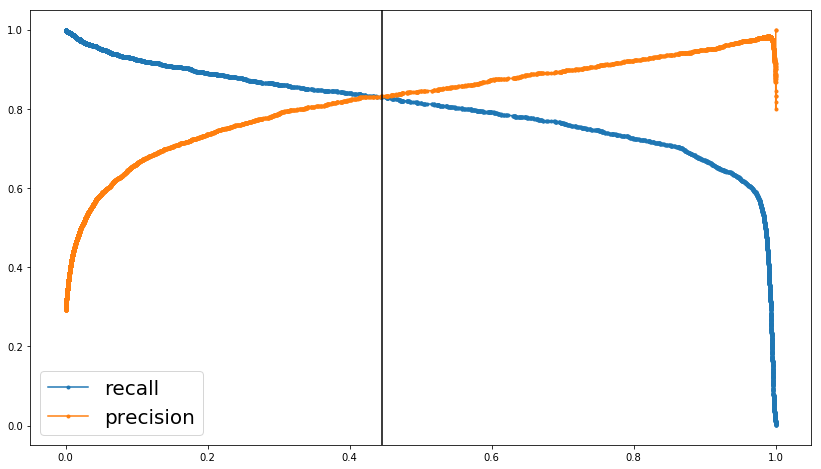

In [ ]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(14,8))
y_prob=logreg_clf.predict_proba(count_test)[:,1]
precisions, recalls, threshold = precision_recall_curve(y_test, y_prob)
plt.plot(threshold,recalls[:-1],marker='.',label='recall')
plt.plot(threshold,precisions[:-1],marker='.',label='precision')
plt.legend(frameon=True,fontsize=20)
plt.axvline(x=0.445,c='black')

plt.show()

## The Probablity threshold for Balanced value of Precision vs Recall is `0.445`
Note: We can pick any Probability threshold for classifying the lables as per requirement and trade-off between Precision and Recall.

## ROC Curve (Receiver Operating Characteristic):

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

So **ROC curve** is basically  telling us how well our classifier is classifying between ADR (True Positives) and Non-ADR. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [ ]:
from sklearn.metrics import roc_curve
lrd_fpr, lrd_tpr, threshold = roc_curve(y_test, y_prob)

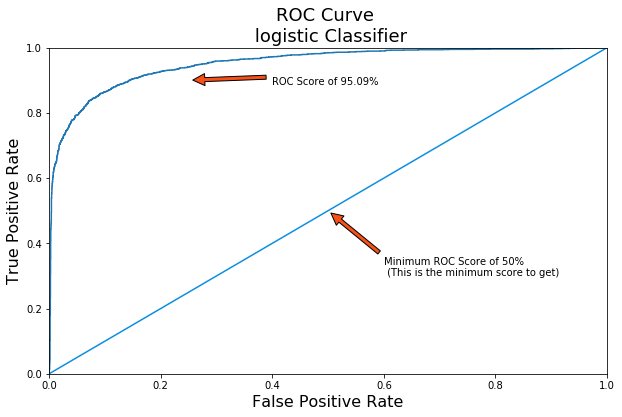

In [ ]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n logistic Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 95.09% \n ', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(lrd_fpr, lrd_tpr, threshold)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression Classifier AUC-ROC Score: ', roc_auc_score(y_test, y_prob))


Logistic Regression Classifier AUC-ROC Score:  0.950893314907342


## Conclusion
With this, we can conclude that we created a mathematical model that can be used to increase the effectiveness of classification of tweets into **ADR and Non-ADR ** and evaluated the model on various parameters and metrics<br>
We can proceed with implementation of this model on real time data and can also **tweak** it to produce results based on different requirments by **changing the threshold Probability of classification.** <br>
Given below is performance metrics values, we used to evaluate our logistic Regression Model:
- **Accuracy-Score : 90.19%**
- **Precision : 84.25**
- **Recall :  81.35**
- **f1- Score : 82.92**
- **ROC-AUC Score : 95.08**

Before we end our analysis, let's try some ensembling models and see, if we are able to achieve any significant increase in our predictive power.

## Trying Ensemble based algorithms
**Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model**
- **BAGGing**, or Bootstrap AGGregating. BAGGing gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. Given a sample of data, multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples. After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor which is also known as Random Forest.
- **Boosting: ** In this models are trained sequentially, where (n)th model uses the output of (n-1)th model and works on the limitation of the previous model, the process stops when result stops improving.<br>
 XGBoost is an algorithm that has recently been dominating applied machine learning. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. 

### Before we jump into creating models, Let's write a function which takes model as input and print Evaluated Scores:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


def get_score(model):
    model.fit(count_train,y_train)
    y_pred=model.predict(count_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("The accuracy for Model is:",accuracy_score(y_test,y_pred))
    print(roc_auc_score(y_test,model.predict_proba(count_test)[:,1]))

### Creating RandomForestClassifier and Hypertuning the Parameters:


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(bootstrap = True,
                                #adjusting Wieght to deal with Heavily Imbalanced Data
                                class_weight = {0:7 , 1:3 } , criterion = 'entropy' , 
                                #depth of Model
                                max_depth = 10,
                                #minimum number of samples at a leaf
                                min_samples_leaf=10 ,  
                                #number of trees 
                                n_estimators=100 , n_jobs = -1 , random_state = 5)


In [ ]:
get_score(rf_model)

[[4992    0]
 [2063    0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4992
           1       0.00      0.00      0.00      2063

   micro avg       0.71      0.71      0.71      7055
   macro avg       0.35      0.50      0.41      7055
weighted avg       0.50      0.71      0.59      7055

The accuracy for Model is: 0.7075832742735648
0.8433704785630833


#### Implementing GridSearchCV for RandomForest

In [ ]:
params = { 'n_estimators':[100,150,200],
          'max_features': ['auto', 'log2'] ,
          'class_weight':[{0:3,1:7},'balanced','balanced_subsample',None],
          'max_depth' : [16,32,64] , 
          'min_samples_leaf' : [5,10,15],
          'criterion' : ['gini', 'entropy']
            }

sample_model = RandomForestClassifier(random_state = 42,n_jobs=-1)

In [36]:
cv_model = GridSearchCV(estimator= sample_model, param_grid=params, cv = 3 , scoring='accuracy' , n_jobs = -1)
cv_model.fit(count_train, y_train)
cv_model.best_params_

{'class_weight': {0: 3, 1: 7},
 'criterion': 'gini',
 'max_depth': 64,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [ ]:
rf_clf = RandomForestClassifier(**cv_model.best_params_, n_jobs = -1 , random_state =42)

In [40]:
get_score(rf_clf)

[[4426  566]
 [ 736 1327]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4992
           1       0.70      0.64      0.67      2063

   micro avg       0.82      0.82      0.82      7055
   macro avg       0.78      0.76      0.77      7055
weighted avg       0.81      0.82      0.81      7055

The accuracy for Model is: 0.8154500354358611
0.8699102276681954


#### Creating and Hypertuning the XGBoost model intensively.
- grid search for max_depth,min_child_weight.
- parameter scale_pos_weight is quite important in case of imbalanced dataset




In [ ]:
from xgboost import XGBClassifier


In [ ]:
from sklearn.model_selection import GridSearchCV
param_test = {
  'min_child_weight':[5,6],
#   'max_depth': range(3,10,2),
#   'n_estimators':[150,200,300,400],
#   'scale_pos_weight':[1,2,3,4],
#   'colsample_bytree':[0.7,0.8], 
#   'subsample':[0.7,0.8],
#   'gamma':[0,0.2,0.4]
    
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch.fit(count_train, y_train)
#print(gsearch.grid_scores_)
print("gsearch.best_params_",gsearch.best_params_)
print("gsearch.best_score_",gsearch.best_score_)


gsearch.best_params_ {'min_child_weight': 5}
gsearch.best_score_ 0.5426579381731707


In [ ]:
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(count_train, y_train)
y_xg = modelXg.predict(count_test)

In [ ]:
## Determine whether your model is overfitting or not , with the help of ROC.
print(confusion_matrix(y_test, y_xg))
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(count_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(count_train)[:,1]))

[[3996  996]
 [ 474 1589]]
Accuracy_score: 79.16% on test dataset
precision_score: 61.47% on test dataset
recall_score: 77.02% on test dataset
f1_score: 68.37% on test dataset
roc_auc test set 0.8678951275992146
roc_auc training set 0.8931396938664803


### Stacking algorithm
**Stacking**: (also called meta ensembling) is a model ensembling technique used to combine information from multiple  trained predictive models to generate a new model. <br>
Often times the stacked model (also called 2nd-level model) will outperform each of the individual models due its smoothing nature and ability to highlight each base model where it performs best and discredit each base model where it performs poorly. For this reason, stacking is most effective when the base models are significantly different.
### Let's Proceed with stacking  create ML Classifier


### Voting Rule Parameter¶
- **Hard** : Uses predicted class Labels and takes Majority Votes. 
- **Soft** : uses Average probability by combining probablities of individual models.

We can Also assign weights to model prediction when we know that one of the models is outperforming. For example:
<br>
ens_model = VotingClassifier( estimators = [('lr' , clf1) ,( 'rf', clf2),( 'nb', clf3) ], voting = 'hard' , weights = [1,2,1] ]

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = logreg_clf
clf2 = rf_clf
ensemble_model = VotingClassifier(estimators = [('lr' , clf1) , ('rf' , clf2)], voting ='soft')

In [ ]:
get_score(ensemble_model)

[[4688  304]
 [ 385 1678]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4992
           1       0.85      0.81      0.83      2063

   micro avg       0.90      0.90      0.90      7055
   macro avg       0.89      0.88      0.88      7055
weighted avg       0.90      0.90      0.90      7055

The accuracy for Model is: 0.9023387668320341
0.9488658343897983


### As can see the results are similar and there isn't any significant advantage, so we will stick with our Logistic Regression model and implement that as using ensemble models increases the time as well as computational cost and it's not adding any significant improvement on our dataset.